<div style="text-align: left;"><img src="https://i.imgur.com/BC2sAdw.png" align="left" width="200" title="Universiteit Leiden"/ ></div>

<font color='#0C2577'><b>Improving the age at onset estimation for Huntington’s Disease using Machine Learning models on top of the Enroll-HD data</b></font>

<left><font color='#0C2577'>JC Marchiori Dias – BioInformatics Master Thesis 2023/2024 - Notebook 4</font></left> 

<left><font color='#0C2577'>Leiden University - LUMC BioSemantics Group</font></left>

#### Import Libraries

In [1]:
## Importing Relevant Python Libraries

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import methods.HD_AAO_Estim_Improv_Methods as aao


#### Options for the notebook

In [2]:
## Set options for pandas
# to have better/more output from lists/dataframes

pd.options.display.max_rows = 100
pd.set_option('display.max_columns', None)

In [60]:
# plt.rcParams['figure.dpi'] = 600
# plt.rcParams['savefig.dpi'] = 600

#### Group Features Definition

In [4]:
## Grouping of different features provided by Enroll-HD

patient_features =  ['caghigh', 'caglow', 'parenthd_impFill', 'region_impFill', 'parentagesx_impFill', 'sex', 'race',
                     'handed_impFill', 'weight_filled_impFill', 'height_filled_impFill']

others = ['rtrddur_filled_impFill', 'age', 'cap_score', 'bmi_new_impFill', 'packy_impFill', 'hxpacky_impFill',
          'cUHDRS', 'alcab_filled_impFill', 'tobyos_impFill', 'tobcpd_impFill', 'patient_alive_impFill']

under_eval = ['tobab_filled_impFill']

lifestyle_features = ['isced_filled_impFill', 'maristat_filled_impFill', 'res_filled_impFill', 'jobclas_filled_impFill',
                      'emplnrsn_filled_impFill', 'nmdrg_filled_impFill', 'nmdrgfrq_filled_impFill', 'cafab_filled_impFill',
                      'cafpd_filled_impFill', 'hxalcab_filled_impFill', 'alcunits_filled_impFill', 'hxtobab_filled_impFill',
                      'hxtobcpd_impFill', 'hxtobyos_impFill']

assessm_features = ['pbashalsm_1', 'pbashalsm_2', 'pbashalsm_3', 'pbashalsm_4', 'pbashalsm_5', 'pbasaptsv_impFill',
'pbasdelfr_impFill', 'pbashalsv_impFill', 'pbashalfr_impFill', 'swrt_impFill', 'sbh7_impFill', 'scnt_impFill',
'pbasaptfr_impFill', 'ccvab_impFill', 'pbasirrsv_impFill', 'ccdep_impFill', 'ccpsy_impFill', 'cccog_impFill', 
'sit_impFill', 'carelevl_impFill', 'ccapt_impFill', 'sdmt_impFill', 'finances_impFill', 'pbasaggfr_impFill',
'pbasocsv_impFill', 'ccpob_impFill', 'occupatn_impFill', 'ccirb_impFill', 'adl_impFill', 'pbaspersv_impFill',
'pbasirrfr_impFill', 'pbasocfr_impFill', 'pbasperfr_impFill', 'emplusl_impFill', 'verflt_impFill', 'pbassidsv_impFill', 
'pbasdepfr_impFill', 'pbasaggsv_impFill', 'pbasdelsv_impFill', 'emplany_impFill', 'verfct_impFill', 'chores_impFill', 
'pbasdepsv_impFill', 'pbasanxfr_impFill', 'pbasanxsv_impFill', 'drive_impFill', 'fafinan_impFill', 'bed_impFill',
'pbassidfr_impFill', 'toilet_impFill', 'pbasdisbsv_impFill', 'bathe_impFill', 'sbh_filled_impFill', 
'housewrk_impFill', 'trnchair_impFill', 'supchild_impFill', 'volunt_impFill', 'laundry_impFill', 'grocery_impFill',
'dress_impFill', 'pbasdisbfr_impFill', 'pubtrans_impFill', 'walknbr_impFill', 'cash_impFill', 'prepmeal_impFill',
'comb_impFill', 'telephon_impFill', 'ownmeds_impFill', 'feedself_impFill', 'walkhelp_impFill', 'int1_filled_impFill',
'chorrle_impFill', 'sacvelh_impFill', 'chorlle_impFill', 'carehome_impFill', 'chorrue_impFill', 'chorlue_impFill', 
'dystlle_impFill', 'dystrle_impFill', 'sacvelv_impFill', 'hxsid_impFill', 'rdcwk_filled_impFill', 'sacinitv_impFill', 
'sacinith_impFill', 'walkfall_impFill', 'dystlue_impFill', 'prosupr_impFill', 'dystrue_impFill', 'ocularh_impFill',
'ocularv_impFill', 'prosupl_impFill', 'fingtapl_impFill', 'fingtapr_impFill', 'gait_impFill', 'rigarml_impFill', 
'dysarth_impFill', 'rigarmr_impFill', 'gen1_impFill', 'chorbol_impFill', 'brady_impFill', 'dysttrnk_impFill', 
'chorface_impFill', 'tandem_impFill', 'tongue_impFill', 'chortrnk_impFill', 'retropls_impFill', 'pbainfo_impFill',
'verfct5_impFill', 'indepscl_impFill', 'scnt1_impFill', 'sdmt1_impFill', 'luria_impFill', 'swrt1_impFill', 'sit1_impFill',
'sxmajor_sym_impFill', 'verflt05_impFill', 'verfct6_impFill', 'verflt07_impFill', 'verflt06_impFill', 'sit2_impFill',
'scnt3_impFill', 'sit3_impFill', 'sdmt2_impFill', 'scnt2_impFill', 'swrt3_impFill', 'swrt2_impFill', 'verfct7_impFill',
'ccmtr_impFill']

score_features = ['motscore_impFill', 'tfcscore_impFill', 'fascore_impFill', 'depscore_new_impFill', 
'irascore_new_impFill', 'psyscore_new_impFill', 'aptscore_new_impFill', 'exfscore_new_impFill']

onset_features = ['ccmtrage', 'sxsubj', 'sxfam', 'hddiagn', 'sxrater', 'sxgs', 'sxgsdy', 'ccdepage', 'ccirbage', 'ccvabage', 
'ccaptage', 'ccpobage', 'ccpsyage', 'cccogage']

study_features = ['patient_num', 'subjid', 'studyid', 'year_seq', 'visdy', 'hdcat_0', 'hdcat_l', 'hdcat_impFill', 
'evtnum_filled', 'diagconf_impFill']

reduced_features = ['age', 'caghigh', 'parentagesx_impFill', 'nmdrgfrq_filled_impFill', 'maristat_filled_impFill',
                    'emplnrsn_filled_impFill', 'alcunits_filled_impFill']

In [5]:
## Variable categorization of different features provided by Enroll-HD

bool_cols = ["alcab_filled", "bathe", "bed", "cafab_filled", "cafpd_filled", "carehome", "cash", "ccapt", "cccog", "ccdep", "ccirb",
                 "ccmtr", "ccpob", "ccpsy", "ccvab", "comb", "dress", "drive", "emplany", "emplusl", "fafinan", "feedself", "gen1",
                 "grocery", "housewrk", "hxalcab_filled", "hxsid", "hxtobab_filled", "laundry", "nmdrg_filled", "ownmeds", "parenthd",
                 "patient_alive", "pbashalsm_1", "pbashalsm_2", "pbashalsm_3", "pbashalsm_4", "pbashalsm_5", "prepmeal", "pubtrans",
                 "rdcwk_filled", "sbh_filled", "sbh7", "scnt", "sdmt", "sit", "supchild", "swrt", "telephon", "tobab_filled", "toilet",
                 "trl", "trnchair", "verfct", "verflt", "volunt", "walkfall", "walkhelp", "walknbr"]  # 59 Boolean columns

catg_cols = ["handed", "res_filled", "jobclas_filled", "maristat_filled", "race", "pbainfo", "emplnrsn_filled", "sxmajor_sym",
                 "hdcat", "hdcat_0", "hdcat_l", "region", "sex", "studyid"]  # 14 Categorical columns

ordn_cols = ["adl", "brady", "carelevl", "chorbol", "chores", "chorface", "chorlle", "chorlue", "chorrle", "chorrue",
                 "chortrnk", "diagconf", "dysarth", "dystlle", "dystlue", "dystrle", "dystrue", "dysttrnk", "finances", "fingtapl",
                 "fingtapr", "gait", "indepscl", "int1_filled", "isced_filled", "luria", "nmdrgfrq_filled", "occupatn", "ocularh", "ocularv", "pbasaggfr",
                 "pbasaggsv", "pbasanxfr", "pbasanxsv", "pbasaptfr", "pbasaptsv", "pbasdelfr", "pbasdelsv", "pbasdepfr", "pbasdepsv",
                 "pbasdisbfr", "pbasdisbsv", "pbashalfr", "pbashalsv", "pbasirrfr", "pbasirrsv", "pbasocfr", "pbasocsv", "pbasperfr",
                 "pbaspersv", "pbassidfr", "pbassidsv", "prosupl", "prosupr", "retropls", "rigarml", "rigarmr", "sacinith", "sacinitv",
                 "sacvelh", "sacvelv", "year_seq", "tandem", "tongue"]  # 64 Categorical Ordinal columns // 'seq' is changed to the new version: 'year_seq'

numr_cols = ["age", "alcunits_filled", "aptscore_new", "bmi_new", "caghigh", "caglow",  "ccaptage", "cccogage", "ccdepage",
                 "ccirbage", "ccmtrage", "ccpobage", "ccpsyage", "ccvabage", "depscore_new", "evtnum_filled", "exfscore_new", "fascore",
                 "fiscore", "height_filled", "hxpacky", "hxtobcpd", "hxtobyos", "irascore_new", "miscore", "motscore", "packy",
                 "parentagesx", "psyscore_new", "rtrddur_filled", "scnt1", "scnt2", "scnt3", "sdmt1", "sdmt2", "sit1", "sit2", "sit3",
                 "swrt1", "swrt2", "swrt3", "tfcscore", "tobcpd", "tobyos", "trla1", "trla2", "trla3", "trlb1", "trlb2", "trlb3",
                 "verfct5", "verfct6", "verfct7", "verflt05", "verflt06", "verflt07", "visdy", "weight_filled"]  # 58 Numeric columns

intg_cols = ["age", "aptscore_new", "caghigh", "caglow", "ccaptage", "cccogage", "ccdepage", "ccirbage", "ccmtrage", "ccpobage",
                 "ccpsyage", "ccvabage", "depscore_new", "evtnum_filled", "exfscore_new", "fascore", "fiscore", "hxtobcpd", "hxtobyos", "irascore_new",
                 "miscore", "motscore", "parentagesx", "psyscore_new", "rtrddur_filled", "scnt1", "scnt2", "scnt3", "sdmt1", "sdmt2", "sit1", "sit2", "sit3",
                 "swrt1", "swrt2", "swrt3", "tfcscore", "tobcpd", "tobyos", "trla1", "trla2", "trla3", "trlb1", "trlb2", "trlb3", "verfct5", "verfct6",
                 "verfct7", "verflt05", "verflt06", "verflt07", "visdy"]  # 52 integer columns --> subset of numeric columns



#### Loading Dataset

In [6]:
## Import of pre-processed and imputed data, created by LUMC BioSemantics Group
# Enroll-HD dataset is available after the associated Consortium evaluation and approval, therefore this data cannot be 
# found elsewhere and its location here is private. 

hd_imputed_df = pd.read_csv("~/Study/HD/my_project/hd_workflow_data/data_output/aao_feature_all/imputed_dfs/New_All_cases.csv", index_col="patient_num")

#### Filtering Data

In [7]:
# Define Columns to be used
target_pp = ['hddiagn']
extras_pp = ['subjid', 'ccmtrage', 'sxrater', 'sxfam', 'sxsubj', 'hdcat_0', 'hdcat_l', 'hdcat_impFill']
columns_pp = patient_features + lifestyle_features 

final_feat_df = hd_imputed_df.loc[:, extras_pp + target_pp + columns_pp]
final_feat_df

,subjid,ccmtrage,sxrater,sxfam,sxsubj,hdcat_0,hdcat_l,hdcat_impFill,hddiagn,caghigh,caglow,parenthd_impFill,region_impFill,parentagesx_impFill,sex,race,handed_impFill,weight_filled_impFill,height_filled_impFill,isced_filled_impFill,maristat_filled_impFill,res_filled_impFill,jobclas_filled_impFill,emplnrsn_filled_impFill,nmdrg_filled_impFill,nmdrgfrq_filled_impFill,cafab_filled_impFill,cafpd_filled_impFill,hxalcab_filled_impFill,alcunits_filled_impFill,hxtobab_filled_impFill,hxtobcpd_impFill,hxtobyos_impFill
patient_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15945,103720,61.0,60.0,60.0,60.0,3.0,3.0,3.0,64.0,41,22,0.0,1,105.0,0,0.0,0.0,99.2,188.0,3.0,2.0,2.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0
15946,103720,61.0,60.0,60.0,60.0,3.0,3.0,3.0,64.0,41,22,0.0,1,105.0,0,0.0,0.0,97.5,188.0,3.0,2.0,2.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,6.0,0.0,0.0,0.0
15947,103720,61.0,60.0,60.0,60.0,3.0,3.0,3.0,64.0,41,22,0.0,1,105.0,0,0.0,0.0,95.9,188.0,3.0,2.0,2.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0
15948,103720,61.0,60.0,60.0,60.0,3.0,3.0,3.0,64.0,41,22,0.0,1,105.0,0,0.0,0.0,93.4,188.0,3.0,2.0,2.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0
15949,103720,61.0,60.0,60.0,60.0,3.0,3.0,3.0,64.0,41,22,0.0,1,105.0,0,0.0,0.0,96.2,188.0,3.0,2.0,2.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82984,999534341,27.0,27.0,27.0,27.0,2.0,3.0,3.0,27.0,48,18,1.0,3,45.0,1,0.0,0.0,54.0,159.0,2.0,0.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0
82985,999534341,27.0,27.0,27.0,27.0,2.0,3.0,3.0,27.0,48,18,1.0,3,45.0,1,0.0,0.0,50.0,159.0,2.0,0.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0
82986,999534341,27.0,27.0,27.0,27.0,2.0,3.0,3.0,27.0,48,18,1.0,3,45.0,1,0.0,0.0,48.0,159.0,2.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0


In [8]:
# Split Categorical features from the others

num_columns_pp = []
cat_columns_pp = []

for i in columns_pp:
    if i in catg_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in catg_cols:
        cat_columns_pp.append(i)
    elif i in ordn_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in ordn_cols:
        cat_columns_pp.append(i)        
    else:
        num_columns_pp.append(i)    

In [9]:
# Run the OneHotEnconding
drop_cat = True
remain_features = extras_pp + num_columns_pp

oneHotenconded_df, cat_cols = aao.OneHotEncodingFunc(final_feat_df, target_pp, remain_features, cat_columns_pp, drop_cat)

In [10]:
# Train + Test Dataset

final_feat_df = oneHotenconded_df[(oneHotenconded_df['caghigh'] >= 35) & (oneHotenconded_df['hdcat_l'] == 3.0) &
                                  (oneHotenconded_df['hdcat_0'] == 2.0) & (oneHotenconded_df['hdcat_impFill'] == 3.0)]

final_feat_df['hddiagn'].fillna(final_feat_df['ccmtrage'], inplace=True)
final_feat_df['hddiagn'].fillna(final_feat_df['sxrater'], inplace=True)
final_feat_df['hddiagn'].fillna(final_feat_df['sxfam'], inplace=True)
final_feat_df['hddiagn'].fillna(final_feat_df['sxsubj'], inplace=True)

final_feat_df = final_feat_df.groupby('subjid').first()
final_feat_df = final_feat_df.reset_index()
final_feat_df.dropna(subset = ['hddiagn'], inplace=True)
final_feat_df

,subjid,patient_num,hddiagn,ccmtrage,sxrater,sxfam,sxsubj,hdcat_0,hdcat_l,hdcat_impFill,caghigh,caglow,parenthd_impFill,parentagesx_impFill,weight_filled_impFill,height_filled_impFill,nmdrg_filled_impFill,cafab_filled_impFill,cafpd_filled_impFill,hxalcab_filled_impFill,alcunits_filled_impFill,hxtobab_filled_impFill,hxtobcpd_impFill,hxtobyos_impFill,region_impFill_0,region_impFill_1,region_impFill_2,region_impFill_3,sex_0,sex_1,race_0.0,race_1.0,race_2.0,race_5.0,race_7.0,race_14.0,race_15.0,handed_impFill_0.0,handed_impFill_1.0,handed_impFill_2.0,isced_filled_impFill_0.0,isced_filled_impFill_1.0,isced_filled_impFill_2.0,isced_filled_impFill_3.0,isced_filled_impFill_4.0,isced_filled_impFill_5.0,isced_filled_impFill_6.0,maristat_filled_impFill_0.0,maristat_filled_impFill_1.0,maristat_filled_impFill_2.0,maristat_filled_impFill_3.0,maristat_filled_impFill_4.0,maristat_filled_impFill_5.0,res_filled_impFill_0.0,res_filled_impFill_1.0,res_filled_impFill_2.0,res_filled_impFill_3.0,jobclas_filled_impFill_0.0,jobclas_filled_impFill_1.0,jobclas_filled_impFill_2.0,jobclas_filled_impFill_3.0,emplnrsn_filled_impFill_0.0,emplnrsn_filled_impFill_1.0,emplnrsn_filled_impFill_2.0,emplnrsn_filled_impFill_3.0,emplnrsn_filled_impFill_4.0,emplnrsn_filled_impFill_5.0,nmdrgfrq_filled_impFill_0.0,nmdrgfrq_filled_impFill_1.0,nmdrgfrq_filled_impFill_2.0,nmdrgfrq_filled_impFill_3.0
0,1347826,16026,68.0,68.0,68.0,67.0,67.0,2.0,3.0,3.0,41,15,1.0,59.0,68.0,167.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2593663,16124,53.0,52.0,53.0,53.0,53.0,2.0,3.0,3.0,42,20,1.0,60.0,80.0,178.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,5033118,16283,57.0,56.0,57.0,57.0,57.0,2.0,3.0,3.0,43,23,1.0,43.0,73.0,183.0,0.0,1.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5796487,16321,49.0,50.0,51.0,52.0,NaN,2.0,3.0,3.0,42,18,1.0,65.0,68.0,170.0,0.0,0.0,0.0,1.0,7.0,1.0,18.0,20.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5895058,16334,45.0,43.0,45.0,43.0,NaN,2.0,3.0,3.0,45,25,1.0,50.0,79.4,170.0,0.0,1.0,1.0,0.0,4.0,1.0,20.0,15.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,988755452,82281,43.0,43.0,44.0,NaN,NaN,2.0,3.0,3.0,41,19,1.0,54.0,75.0,180.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
885,995587389,82747,39.0,36.0,37.0,37.0,37.0,2.0,3.0,3.0,48,18,1.0,32.0,69.9,177.8,0.0,1.0,0.0,0.0,0.0,1.0,8.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
886,996268693,82790,43.0,43.0,43.0,43.0,NaN,2.0,3.0,3.0,46,22,1.0,55.0,71.1,180.0,0.0,1.0,1.0,1.0,25.0,1.0,12.0,16.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0

In [11]:
# Validation Dataset

validation_df = oneHotenconded_df[(oneHotenconded_df['caghigh'] >= 35) & (oneHotenconded_df['hdcat_l'] == 3.0) &
                                  (oneHotenconded_df['hdcat_0'] == 3.0) & (oneHotenconded_df['hdcat_impFill'] == 3.0)]

validation_df['hddiagn'].fillna(validation_df['ccmtrage'], inplace=True)
validation_df['hddiagn'].fillna(validation_df['sxrater'], inplace=True)
validation_df['hddiagn'].fillna(validation_df['sxfam'], inplace=True)
validation_df['hddiagn'].fillna(validation_df['sxsubj'], inplace=True)

validation_df = validation_df.groupby('subjid').first()
validation_df = validation_df.reset_index()
validation_df.dropna(subset = ['hddiagn'], inplace=True)
validation_df

,subjid,patient_num,hddiagn,ccmtrage,sxrater,sxfam,sxsubj,hdcat_0,hdcat_l,hdcat_impFill,caghigh,caglow,parenthd_impFill,parentagesx_impFill,weight_filled_impFill,height_filled_impFill,nmdrg_filled_impFill,cafab_filled_impFill,cafpd_filled_impFill,hxalcab_filled_impFill,alcunits_filled_impFill,hxtobab_filled_impFill,hxtobcpd_impFill,hxtobyos_impFill,region_impFill_0,region_impFill_1,region_impFill_2,region_impFill_3,sex_0,sex_1,race_0.0,race_1.0,race_2.0,race_5.0,race_7.0,race_14.0,race_15.0,handed_impFill_0.0,handed_impFill_1.0,handed_impFill_2.0,isced_filled_impFill_0.0,isced_filled_impFill_1.0,isced_filled_impFill_2.0,isced_filled_impFill_3.0,isced_filled_impFill_4.0,isced_filled_impFill_5.0,isced_filled_impFill_6.0,maristat_filled_impFill_0.0,maristat_filled_impFill_1.0,maristat_filled_impFill_2.0,maristat_filled_impFill_3.0,maristat_filled_impFill_4.0,maristat_filled_impFill_5.0,res_filled_impFill_0.0,res_filled_impFill_1.0,res_filled_impFill_2.0,res_filled_impFill_3.0,jobclas_filled_impFill_0.0,jobclas_filled_impFill_1.0,jobclas_filled_impFill_2.0,jobclas_filled_impFill_3.0,emplnrsn_filled_impFill_0.0,emplnrsn_filled_impFill_1.0,emplnrsn_filled_impFill_2.0,emplnrsn_filled_impFill_3.0,emplnrsn_filled_impFill_4.0,emplnrsn_filled_impFill_5.0,nmdrgfrq_filled_impFill_0.0,nmdrgfrq_filled_impFill_1.0,nmdrgfrq_filled_impFill_2.0,nmdrgfrq_filled_impFill_3.0
0,24542,15939,47.0,42.0,42.0,42.0,42.0,3.0,3.0,3.0,44,19,1.0,50.0,67.9,185.4,0.0,1.0,0.0,0.0,8.362,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,103720,15945,64.0,61.0,60.0,60.0,60.0,3.0,3.0,3.0,41,22,0.0,105.0,99.2,188.0,0.0,1.0,1.0,0.0,3.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,147438,15951,81.0,76.0,76.0,77.0,76.0,3.0,3.0,3.0,41,23,1.0,62.0,65.0,169.0,0.0,1.0,1.0,0.0,0.000,1.0,20.0,38.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,239460,15958,70.0,65.0,66.0,70.0,67.0,3.0,3.0,3.0,41,20,1.0,70.0,84.0,180.0,0.0,1.0,0.0,0.0,9.000,1.0,2.0,40.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,458994,978,42.0,41.0,37.0,NaN,37.0,3.0,3.0,3.0,45,17,1.0,39.0,68.0,169.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10266,999820346,15930,65.0,63.0,63.0,63.0,64.0,3.0,3.0,3.0,42,22,1.0,60.0,67.0,170.0,0.0,1.0,1.0,0.0,0.000,0.0,40.0,20.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10267,999841810,83020,53.0,40.0,40.0,40.0,40.0,3.0,3.0,3.0,44,18,1.0,55.0,58.0,171.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10268,999891140,83023,61.0,59.0,60.0,60.0,60.0,3.0,3.0,3.0,40,26,1.0,65.0,65.0,172.0,0.0,1.0,1.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1

#### Train the Models - Penetrant HD Range (>= 40)

In [12]:
## Train the tuned models and send over a validation test set

# Parameters

ml_runs = 500
cag_min = 40
cag_max = 61
runOneHotEnc = 0
target = 'hddiagn'

# Selections

# selection_1 = ['caghigh', 'parentagesx_impFill', 'hxtobyos_impFill', 'emplnrsn_filled_impFill', 'maristat_filled_impFill',
#               'region_impFill']

selection_1 = ['caghigh', 'parentagesx_impFill', 'hxtobyos_impFill', 'emplnrsn_filled_impFill', 'maristat_filled_impFill',
              'region_impFill', 'nmdrgfrq_filled_impFill']

# ---------------------------------------------------
# Selection 1

num_columns_pp = []
cat_columns_pp = []

for i in selection_1:
    if i in final_feat_df.columns:
        num_columns_pp.append(i)
    else: 
        for variable in final_feat_df.columns:
            if i in variable:
                cat_columns_pp.append(variable)       

cols_fs1 = [num_columns_pp, cat_columns_pp]
NNparams = [125, 10, 2]

cb_fs1, nn_fs1, cb_res_fs1, nn_res_fs1, seed_list, lb_eval, cb_val, nn_val, cb_vaL_res, nn_val_res = aao.tryTwoModels(final_feat_df, ml_runs, cols_fs1, target, cag_min, cag_max, NNparams, runOneHotEnc, validation_df)

print("\nFeature Selection 1")
print("\nCatBoost mean results after", ml_runs, "runs:\n", cb_fs1)
print("\nFeedForward Neural Network mean results after", ml_runs, "runs:\n", nn_fs1)
print("\nLangbehn Calculation (MAE/RMSE/R2):\n", lb_eval)
print("\nCatBoost Validation Test\n", cb_val)
print("\nNeural Network Validation Test\n", nn_val)

Total Patients: 845
6/6 [==============================] - 0s 1ms/step


311/311 [==============================] - 0s 538us/step


311/311 [==============================] - 0s 548us/step


6/6 [==============================] - 0s 1ms/step


6/6 [==============================] - 0s 969us/step


311/311 [==============================] - 0s 611us/step


311/311 [==============================] - 0s 597us/step

Feature Selection 1

CatBoost mean results after 500 runs:
         MAE    RMSE        R2
0  5.012857  6.4226  0.660037

FeedForward Neural Network mean results after 500 runs:
         MAE     RMSE        R2
0  5.233604  6.69816  0.630295

Langbehn Calculation (MAE/RMSE/R2):
 [5.960552347341451, 7.6924828341340525, 0.5739367508027419]

CatBoost Validation Test
         MAE      RMSE       R2
0  5.223279  6.781384  0.66887

Neural Network Validation Test
        MAE      RMSE        R2
0  5.55892  7.193797  0.627296


In [13]:
seed_list

[1959616632,
 1764988666,
 2974470323,
 2802642817,
 3408648937,
 2848520071,
 2541185298,
 1938035043,
 979588883,
 2945431234,
 2619499982,
 1472763435,
 1882834245,
 1242788479,
 692918221,
 2843033262,
 1449586754,
 3634870389,
 2394926771,
 108781295,
 3833499788,
 551330368,
 1408097400,
 3701048477,
 3732505680,
 3696077182,
 3941025471,
 4186116446,
 1934006379,
 1426386950,
 2501831229,
 3599778511,
 2712796045,
 2318039540,
 1229164962,
 983724817,
 536246230,
 2325764023,
 1648210674,
 2161149054,
 441837399,
 2149567361,
 1641697218,
 1335566685,
 1109253604,
 1858035390,
 3885474657,
 1499943883,
 358682750,
 2479432227,
 3186618954,
 627799372,
 4144266863,
 2985990594,
 1501452948,
 3617812407,
 1682986280,
 4134560459,
 813508021,
 4250207231,
 1204742638,
 3677062356,
 2929824514,
 813561757,
 3033621013,
 1394254333,
 1932346504,
 255363052,
 4152319859,
 1373336545,
 2661101491,
 3860041372,
 1124093381,
 684126934,
 3960764082,
 3191211390,
 3636675559,
 3558435676,

In [14]:
## Saving the Seed List

seed_df = pd.DataFrame(seed_list, columns=['seed'])
seed_df.to_csv("~/Study/HD/my_project/notebooks/HD_AAO_Estim_Improv_4_Experiments_SeedList_PenetrantRange.csv", index=False)

In [15]:
## Process the results

mae_n_fs1 = []
for i in range(len(nn_res_fs1)): mae_n_fs1.append(nn_res_fs1[i][0])
mae_c_fs1 = []
for i in range(len(cb_res_fs1)): mae_c_fs1.append(cb_res_fs1[i][0])

rmse_n_fs1 = []
for i in range(len(nn_res_fs1)): rmse_n_fs1.append(nn_res_fs1[i][1])
rmse_c_fs1 = []
for i in range(len(cb_res_fs1)): rmse_c_fs1.append(cb_res_fs1[i][1])   
    
r2_n_fs1 = []
for i in range(len(nn_res_fs1)): r2_n_fs1.append(nn_res_fs1[i][2])
r2_c_fs1 = []
for i in range(len(cb_res_fs1)): r2_c_fs1.append(cb_res_fs1[i][2])
    
runs = range(1, len(cb_res_fs1)+1)

cb_df = pd.DataFrame(cb_res_fs1, columns=['mae', 'rmse', 'r2'])
nn_df = pd.DataFrame(nn_res_fs1, columns=['mae', 'rmse', 'r2'])
cb_val_df = pd.DataFrame(cb_vaL_res, columns=['mae', 'rmse', 'r2'])
nn_val_df = pd.DataFrame(nn_val_res, columns=['mae', 'rmse', 'r2'])

In [16]:
# Penetrant Range (Training Statistics)

print("Penetrant Range (Training Statistics)")
print("---------------------------------------------------")
print("\nCatBoost Training MAE average: ", np.nanmean(mae_c_fs1))
print("\nCatBoost Training MAE standard deviation: ", np.nanstd(mae_c_fs1))
print("\nCatBoost Training MAE variance: ", np.nanvar(mae_c_fs1))
print("\nCatBoost Training MAE median: ", np.nanmedian(mae_c_fs1))
print("\nCatBoost Training RMSE average: ", np.nanmean(rmse_c_fs1))
print("\nCatBoost Training RMSE standard deviation: ", np.nanstd(rmse_c_fs1))
print("\nCatBoost Training RMSE variance: ", np.nanvar(rmse_c_fs1))
print("\nCatBoost Training RMSE median: ", np.nanmedian(rmse_c_fs1))
print("\nCatBoost Training R2 average: ", np.nanmean(r2_c_fs1))
print("\nCatBoost Training R2 standard deviation: ", np.nanstd(r2_c_fs1))
print("\nCatBoost Training R2 variance: ", np.nanvar(r2_c_fs1))
print("\nCatBoost Training R2 median: ", np.nanmedian(r2_c_fs1))
print("---------------------------------------------------")
print("\nFNN Training MAE average: ", np.nanmean(mae_n_fs1))
print("\nFNN Training MAE standard deviation: ", np.nanstd(mae_n_fs1))
print("\nFNN Training MAE variance: ", np.nanvar(mae_n_fs1))
print("\nFNN Training MAE median: ", np.nanmedian(mae_n_fs1))
print("\nFNN Training RMSE average: ", np.nanmean(rmse_n_fs1))
print("\nFNN Training RMSE standard deviation: ", np.nanstd(rmse_n_fs1))
print("\nFNN Training RMSE variance: ", np.nanvar(rmse_n_fs1))
print("\nFNN Training RMSE median: ", np.nanmedian(rmse_n_fs1))
print("\nFNN Training R2 average: ", np.nanmean(r2_n_fs1))
print("\nFNN Training R2 standard deviation: ", np.nanstd(r2_n_fs1))
print("\nFNN Training R2 variance: ", np.nanvar(r2_n_fs1))
print("\nFNN Training R2 median: ", np.nanmedian(r2_n_fs1))
print("---------------------------------------------------")

Penetrant Range (Training Statistics)
---------------------------------------------------

CatBoost Training MAE average:  5.012857054967191

CatBoost Training MAE standard deviation:  0.27227425638204594

CatBoost Training MAE variance:  0.07413327068839609

CatBoost Training MAE median:  5.002221803592906

CatBoost Training RMSE average:  6.4225997570975855

CatBoost Training RMSE standard deviation:  0.3580028053597315

CatBoost Training RMSE variance:  0.12816600864543778

CatBoost Training RMSE median:  6.425547092470022

CatBoost Training R2 average:  0.6600373996174477

CatBoost Training R2 standard deviation:  0.03901804924731794

CatBoost Training R2 variance:  0.0015224081670661286

CatBoost Training R2 median:  0.661665162505731
---------------------------------------------------

FNN Training MAE average:  5.233603589131282

FNN Training MAE standard deviation:  0.3132200715330908

FNN Training MAE variance:  0.09810681321119452

FNN Training MAE median:  5.226924427867641


In [17]:
# Penetrant Range (Validation Statistics)

print("Penetrant Range (Validation Statistics)")
print("---------------------------------------------------")
print("\nCatBoost Validation MAE average: ", np.nanmean(cb_val_df['mae']))
print("\nCatBoost Validation MAE standard deviation: ", np.nanstd(cb_val_df['mae']))
print("\nCatBoost Validation MAE variance: ", np.nanvar(cb_val_df['mae']))
print("\nCatBoost Validation MAE median: ", np.nanmedian(cb_val_df['mae']))
print("\nCatBoost Validation RMSE average: ", np.nanmean(cb_val_df['rmse']))
print("\nCatBoost Validation RMSE standard deviation: ", np.nanstd(cb_val_df['rmse']))
print("\nCatBoost Validation RMSE variance: ", np.nanvar(cb_val_df['rmse']))
print("\nCatBoost Validation RMSE median: ", np.nanmedian(cb_val_df['rmse']))
print("\nCatBoost Validation R2 average: ", np.nanmean(cb_val_df['r2']))
print("\nCatBoost Validation R2 standard deviation: ", np.nanstd(cb_val_df['r2']))
print("\nCatBoost Validation R2 variance: ", np.nanvar(cb_val_df['r2']))
print("\nCatBoost Validation R2 median: ", np.nanmedian(cb_val_df['r2']))
print("---------------------------------------------------")
print("\nFNN Validation MAE average: ", np.nanmean(nn_val_df['mae']))
print("\nFNN Validation MAE standard deviation: ", np.nanstd(nn_val_df['mae']))
print("\nFNN Validation MAE variance: ", np.nanvar(nn_val_df['mae']))
print("\nFNN Validation MAE median: ", np.nanmedian(nn_val_df['mae']))
print("\nFNN Validation RMSE average: ", np.nanmean(nn_val_df['rmse']))
print("\nFNN Validation RMSE standard deviation: ", np.nanstd(nn_val_df['rmse']))
print("\nFNN Validation RMSE variance: ", np.nanvar(nn_val_df['rmse']))
print("\nFNN Validation RMSE median: ", np.nanmedian(nn_val_df['rmse']))
print("\nFNN Validation R2 average: ", np.nanmean(nn_val_df['r2']))
print("\nFNN Validation R2 standard deviation: ", np.nanstd(nn_val_df['r2']))
print("\nFNN Validation R2 variance: ", np.nanvar(nn_val_df['r2']))
print("\nFNN Validation R2 median: ", np.nanmedian(nn_val_df['r2']))
print("---------------------------------------------------")

Penetrant Range (Validation Statistics)
---------------------------------------------------

CatBoost Validation MAE average:  5.22327923919479

CatBoost Validation MAE standard deviation:  0.04047179973697989

CatBoost Validation MAE variance:  0.0016379665739502055

CatBoost Validation MAE median:  5.222334997739287

CatBoost Validation RMSE average:  6.781384346335584

CatBoost Validation RMSE standard deviation:  0.04685211739371315

CatBoost Validation RMSE variance:  0.0021951209042742783

CatBoost Validation RMSE median:  6.77956064796866

CatBoost Validation R2 average:  0.6688700586833786

CatBoost Validation R2 standard deviation:  0.004578691598170182

CatBoost Validation R2 variance:  2.0964416751154217e-05

CatBoost Validation R2 median:  0.6690639310780364
---------------------------------------------------

FNN Validation MAE average:  5.558919544440854

FNN Validation MAE standard deviation:  0.09328597157371676

FNN Validation MAE variance:  0.008702272492452293

FNN V

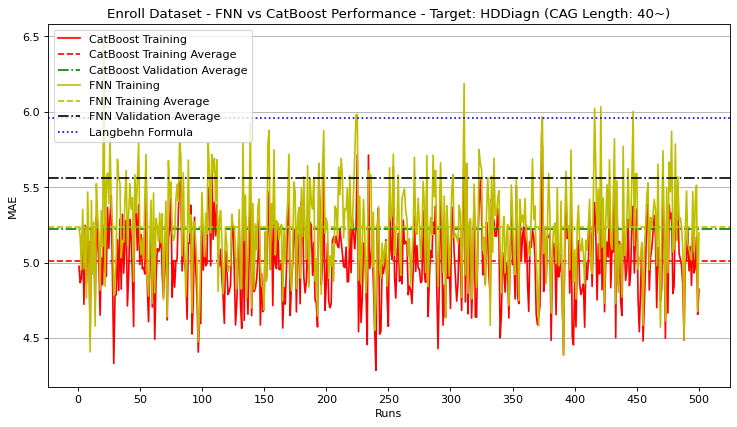

In [61]:
## MAE Graph - CatBoosting vs Neural Network Performance

plt.figure(figsize = (11,6))

plt.plot(runs, mae_c_fs1, 'r', label='CatBoost Training')
plt.axhline(y = np.nanmean(mae_c_fs1), color='r', linestyle='--', label='CatBoost Training Average')
plt.axhline(y = cb_val['MAE'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')
plt.plot(runs, mae_n_fs1, color='y', label='FNN Training')
plt.axhline(y = np.nanmean(mae_n_fs1), color='y', linestyle='--', label='FNN Training Average')
plt.axhline(y = nn_val['MAE'].values, color='black', linestyle='dashdot', label='FNN Validation Average')
plt.axhline(y = lb_eval[0], color='b', linestyle=':', label='Langbehn Formula')

plt.ylabel('MAE')
plt.xlabel('Runs')
plt.xticks(range(0,len(cb_res_fs1)+1,50))
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 40~)')
plt.legend()
plt.grid(axis='y')
plt.show()

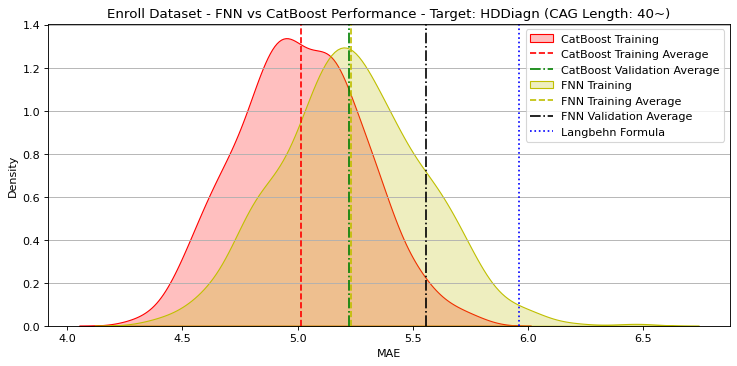

In [62]:
## MAE Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(11,5))

sns.kdeplot(cb_df, x="mae", color='r', ax=ax, label='CatBoost Training', fill=True)
plt.axvline(np.nanmean(mae_c_fs1), 0,9, color='r', linestyle='--', label='CatBoost Training Average')
plt.axvline(cb_val['MAE'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')

sns.kdeplot(nn_df, x="mae", color='y',ax=ax, label='FNN Training', fill=True)
plt.axvline(np.nanmean(mae_n_fs1), 0,9, color='y', linestyle='--', label='FNN Training Average')
plt.axvline(nn_val['MAE'].values, color='black', linestyle='dashdot', label='FNN Validation Average')

plt.axvline(lb_eval[0], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('MAE')
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 40~)')
plt.legend()
plt.grid(axis='y')
plt.show()


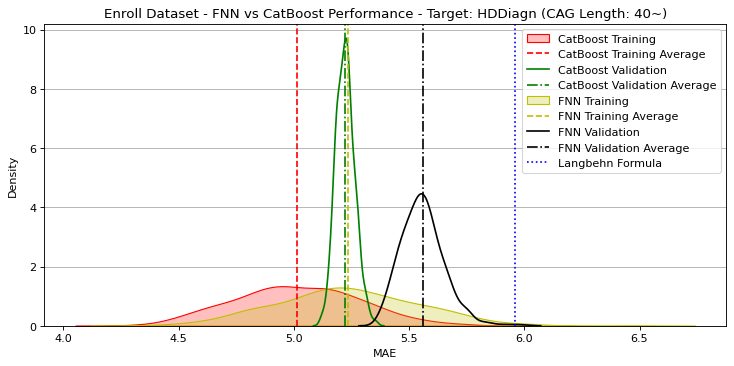

In [63]:
## MAE Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(11,5))

sns.kdeplot(cb_df, x="mae", color='r', ax=ax, label='CatBoost Training', fill=True)
plt.axvline(np.nanmean(mae_c_fs1), 0,9, color='r', linestyle='--', label='CatBoost Training Average')
sns.kdeplot(cb_val_df, x="mae", color='green', ax=ax, label='CatBoost Validation')
plt.axvline(cb_val['MAE'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')

sns.kdeplot(nn_df, x="mae", color='y',ax=ax, label='FNN Training', fill=True)
plt.axvline(np.nanmean(mae_n_fs1), 0,9, color='y', linestyle='--', label='FNN Training Average')
sns.kdeplot(nn_val_df, x="mae", color='black', ax=ax, label='FNN Validation')
plt.axvline(nn_val['MAE'].values, color='black', linestyle='dashdot', label='FNN Validation Average')

plt.axvline(lb_eval[0], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('MAE')
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 40~)')
plt.legend()
plt.grid(axis='y')
plt.show()


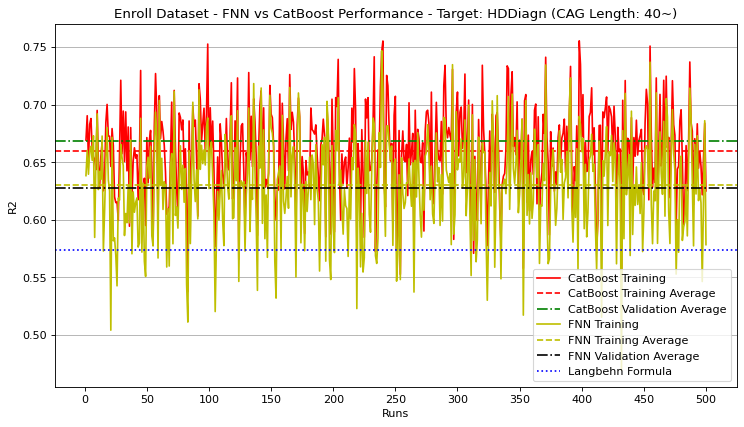

In [64]:
## R2 Graph - CatBoosting vs Neural Network Performance

plt.figure(figsize = (11,6))
plt.plot(runs, r2_c_fs1, 'r', label='CatBoost Training')
plt.axhline(y = np.nanmean(r2_c_fs1), color='r', linestyle='--', label='CatBoost Training Average')
plt.axhline(y = cb_val['R2'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')
plt.plot(runs, r2_n_fs1, color='y', label='FNN Training')
plt.axhline(y = np.nanmean(r2_n_fs1), color='y', linestyle='--', label='FNN Training Average')
plt.axhline(y = nn_val['R2'].values, color='black', linestyle='dashdot', label='FNN Validation Average')
plt.axhline(y = lb_eval[2], color='b', linestyle=':', label='Langbehn Formula')

plt.ylabel('R2')
plt.xlabel('Runs')
plt.xticks(range(0,len(cb_res_fs1)+1,50))
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 40~)')
plt.legend()
plt.grid(axis='y')
plt.show()

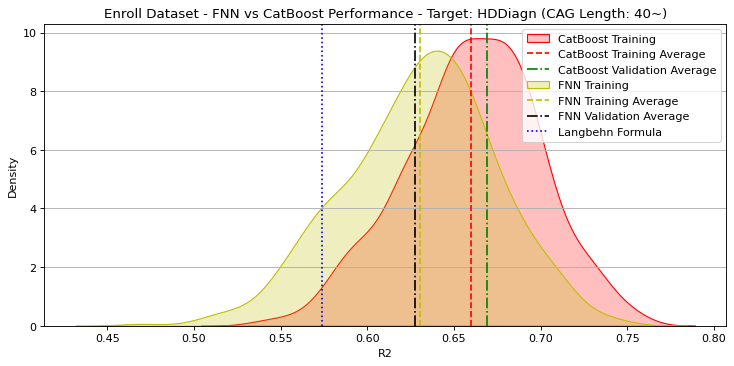

In [65]:
## R2 Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(11,5))

sns.kdeplot(cb_df, x="r2", color='r', ax=ax, label='CatBoost Training', fill=True)
plt.axvline(np.nanmean(r2_c_fs1), 0,9, color='r', linestyle='--', label='CatBoost Training Average')
plt.axvline(cb_val['R2'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')
sns.kdeplot(nn_df, x="r2", color='y',ax=ax, label='FNN Training', fill=True)
plt.axvline(np.nanmean(r2_n_fs1), 0,9, color='y', linestyle='--', label='FNN Training Average')
plt.axvline(nn_val['R2'].values, color='black', linestyle='dashdot', label='FNN Validation Average')
plt.axvline(lb_eval[2], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('R2')
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 40~)')
plt.legend()
plt.grid(axis='y')
plt.show()


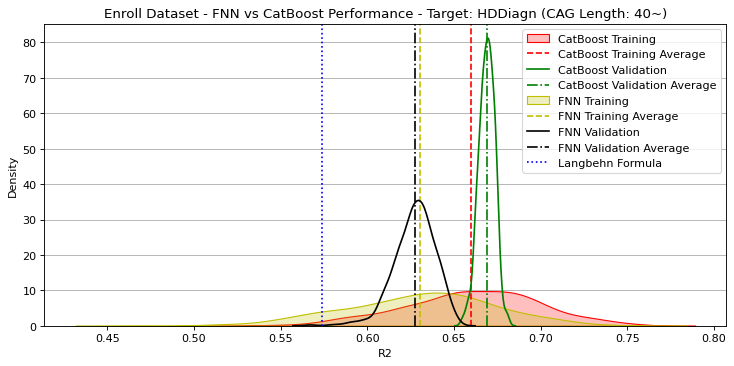

In [66]:
## R2 Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(11,5))

sns.kdeplot(cb_df, x="r2", color='r', ax=ax, label='CatBoost Training', fill=True)
plt.axvline(np.nanmean(r2_c_fs1), 0,9, color='r', linestyle='--', label='CatBoost Training Average')
sns.kdeplot(cb_val_df, x="r2", color='green', ax=ax, label='CatBoost Validation')
plt.axvline(cb_val['R2'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')

sns.kdeplot(nn_df, x="r2", color='y',ax=ax, label='FNN Training', fill=True)
plt.axvline(np.nanmean(r2_n_fs1), 0,9, color='y', linestyle='--', label='FNN Training Average')
sns.kdeplot(nn_val_df, x="r2", color='black', ax=ax, label='FNN Validation')
plt.axvline(nn_val['R2'].values, color='black', linestyle='dashdot', label='FNN Validation Average')

plt.axvline(lb_eval[2], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('R2')
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 40~)')
plt.grid(axis='y')
plt.legend()
plt.show()


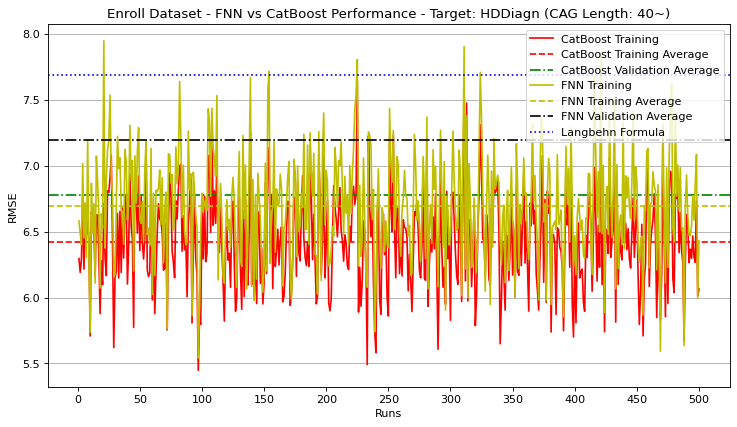

In [67]:
## RMSE Graph - CatBoosting vs Neural Network Performance

plt.figure(figsize = (11,6))

plt.plot(runs, rmse_c_fs1, 'r', label='CatBoost Training')
plt.axhline(y = np.nanmean(rmse_c_fs1), color='r', linestyle='--', label='CatBoost Training Average')
plt.axhline(y = cb_val['RMSE'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')
plt.plot(runs, rmse_n_fs1, color='y', label='FNN Training')
plt.axhline(y = np.nanmean(rmse_n_fs1), color='y', linestyle='--', label='FNN Training Average')
plt.axhline(y = nn_val['RMSE'].values, color='black', linestyle='dashdot', label='FNN Validation Average')
plt.axhline(y = lb_eval[1], color='b', linestyle=':', label='Langbehn Formula')

plt.ylabel('RMSE')
plt.xlabel('Runs')
plt.xticks(range(0,len(cb_res_fs1)+1,50))
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 40~)')
plt.legend()
plt.grid(axis='y')
plt.show()

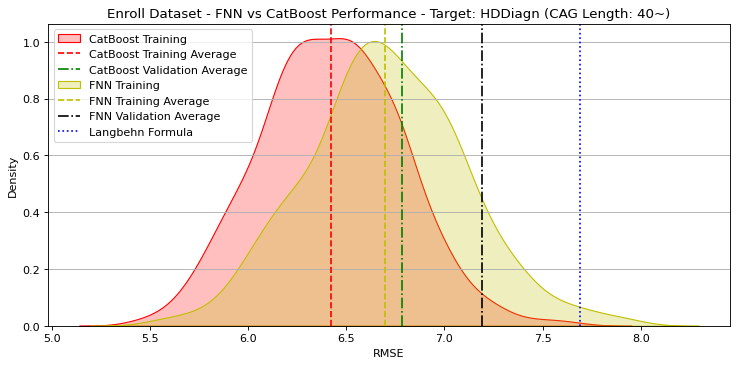

In [68]:
## RMSE Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(11,5))

sns.kdeplot(cb_df, x="rmse", color='r', ax=ax, label='CatBoost Training', fill=True)
plt.axvline(np.nanmean(rmse_c_fs1), 0,9, color='r', linestyle='--', label='CatBoost Training Average')
plt.axvline(cb_val['RMSE'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')

sns.kdeplot(nn_df, x="rmse", color='y',ax=ax, label='FNN Training', fill=True)
plt.axvline(np.nanmean(rmse_n_fs1), 0,9, color='y', linestyle='--', label='FNN Training Average')
plt.axvline(nn_val['RMSE'].values, color='black', linestyle='dashdot', label='FNN Validation Average')

plt.axvline(lb_eval[1], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('RMSE')
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 40~)')
plt.legend()
plt.grid(axis='y')
plt.show()

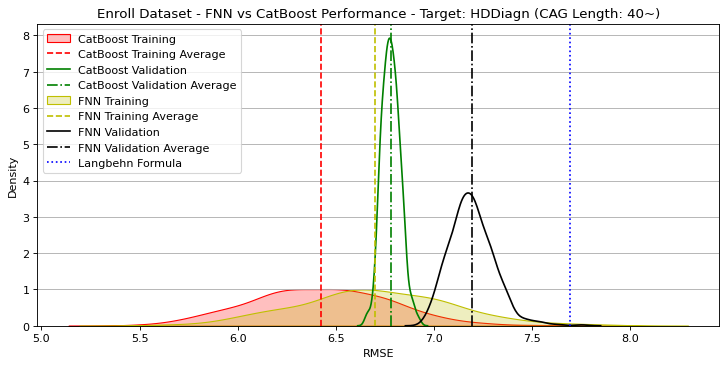

In [69]:
## RMSE Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(11,5))

sns.kdeplot(cb_df, x="rmse", color='r', ax=ax, label='CatBoost Training', fill=True)
plt.axvline(np.nanmean(rmse_c_fs1), 0,9, color='r', linestyle='--', label='CatBoost Training Average')
sns.kdeplot(cb_val_df, x="rmse", color='green', ax=ax, label='CatBoost Validation')
plt.axvline(cb_val['RMSE'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')

sns.kdeplot(nn_df, x="rmse", color='y',ax=ax, label='FNN Training', fill=True)
plt.axvline(np.nanmean(rmse_n_fs1), 0,9, color='y', linestyle='--', label='FNN Training Average')
sns.kdeplot(nn_val_df, x="rmse", color='black', ax=ax, label='FNN Validation')
plt.axvline(nn_val['RMSE'].values, color='black', linestyle='dashdot', label='FNN Validation Average')

plt.axvline(lb_eval[1], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('RMSE')
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 40~)')
plt.legend()
plt.grid(axis='y')
plt.show()


#### Train the Models - Full HD Range (>= 35)

In [27]:
## Train the tuned models and send over a validation test set

# Parameters

ml_runs = 500
cag_min = 35
cag_max = 61
runOneHotEnc = 0
target = 'hddiagn'

# Selections

selection_1 = ['caghigh', 'parentagesx_impFill', 'hxtobyos_impFill', 'emplnrsn_filled_impFill', 'maristat_filled_impFill',
              'region_impFill', 'nmdrgfrq_filled_impFill']

# ---------------------------------------------------
# Selection 1

num_columns_pp = []
cat_columns_pp = []

for i in selection_1:
    if i in final_feat_df.columns:
        num_columns_pp.append(i)
    else: 
        for variable in final_feat_df.columns:
            if i in variable:
                cat_columns_pp.append(variable)       

cols_fs1 = [num_columns_pp, cat_columns_pp]
NNparams = [125, 10, 2]

fr_cb_fs1, fr_nn_fs1, fr_cb_res_fs1, fr_nn_res_fs1, fr_seed_list, fr_lb_eval, fr_cb_val, fr_nn_val, fr_cb_vaL_res, fr_nn_val_res = aao.tryTwoModels(final_feat_df, ml_runs, cols_fs1, target, cag_min, cag_max, NNparams, runOneHotEnc, validation_df)

print("\nFeature Selection")
print("\nCatBoost mean results after", ml_runs, "runs:\n", fr_cb_fs1)
print("\nFeedForward Neural Network mean results after", ml_runs, "runs:\n", fr_nn_fs1)
print("\nLangbehn Calculation (MAE/RMSE/R2):\n", fr_lb_eval)
print("\nCatBoost Validation Test\n", fr_cb_val)
print("\nNeural Network Validation Test\n", fr_nn_val)

Total Patients: 887
6/6 [==============================] - 0s 938us/step


6/6 [==============================] - 0s 1ms/step


6/6 [==============================] - 0s 1ms/step


320/320 [==============================] - 0s 595us/step


320/320 [==============================] - 0s 537us/step


6/6 [==============================] - 0s 918us/step


320/320 [==============================] - 0s 615us/step

Feature Selection

CatBoost mean results after 500 runs:
        MAE     RMSE        R2
0  5.13489  6.57395  0.668311

FeedForward Neural Network mean results after 500 runs:
         MAE      RMSE        R2
0  5.322668  6.835094  0.641347

Langbehn Calculation (MAE/RMSE/R2):
 [6.204296947009516, 8.199180353451007, 0.533868858261165]

CatBoost Validation Test
         MAE      RMSE        R2
0  5.279222  6.848191  0.674811

Neural Network Validation Test
         MAE      RMSE        R2
0  5.613713  7.277882  0.632657


In [28]:
## Saving the Seed List

fr_seed_df = pd.DataFrame(fr_seed_list, columns=['seed'])
fr_seed_df.to_csv("~/Study/HD/my_project/notebooks/HD_AAO_Estim_Improv_4_Experiments_SeedList_FullRange.csv", index=False)

In [29]:
## Process the results

fr_mae_n_fs1 = []
for i in range(len(fr_nn_res_fs1)): fr_mae_n_fs1.append(fr_nn_res_fs1[i][0])
fr_mae_c_fs1 = []
for i in range(len(fr_cb_res_fs1)): fr_mae_c_fs1.append(fr_cb_res_fs1[i][0])
fr_rmse_n_fs1 = []
for i in range(len(fr_nn_res_fs1)): fr_rmse_n_fs1.append(fr_nn_res_fs1[i][1])
fr_rmse_c_fs1 = []
for i in range(len(fr_cb_res_fs1)): fr_rmse_c_fs1.append(fr_cb_res_fs1[i][1])   
fr_r2_n_fs1 = []
for i in range(len(fr_nn_res_fs1)): fr_r2_n_fs1.append(fr_nn_res_fs1[i][2])
fr_r2_c_fs1 = []
for i in range(len(fr_cb_res_fs1)): fr_r2_c_fs1.append(fr_cb_res_fs1[i][2])
    
fr_runs = range(1, len(fr_cb_res_fs1)+1)

fr_cb_df = pd.DataFrame(fr_cb_res_fs1, columns=['mae', 'rmse', 'r2'])
fr_nn_df = pd.DataFrame(fr_nn_res_fs1, columns=['mae', 'rmse', 'r2'])
fr_cb_val_df = pd.DataFrame(fr_cb_vaL_res, columns=['mae', 'rmse', 'r2'])
fr_nn_val_df = pd.DataFrame(fr_nn_val_res, columns=['mae', 'rmse', 'r2'])

In [30]:
# Full Range (Training Statistics)

print("Full Range (Training Statistics)")
print("---------------------------------------------------")
print("\nCatBoost Training MAE average: ", np.nanmean(fr_mae_c_fs1))
print("\nCatBoost Training MAE standard deviation: ", np.nanstd(fr_mae_c_fs1))
print("\nCatBoost Training MAE variance: ", np.nanvar(fr_mae_c_fs1))
print("\nCatBoost Training MAE median: ", np.nanmedian(fr_mae_c_fs1))
print("\nCatBoost Training RMSE average: ", np.nanmean(fr_rmse_c_fs1))
print("\nCatBoost Training RMSE standard deviation: ", np.nanstd(fr_rmse_c_fs1))
print("\nCatBoost Training RMSE variance: ", np.nanvar(fr_rmse_c_fs1))
print("\nCatBoost Training RMSE median: ", np.nanmedian(fr_rmse_c_fs1))
print("\nCatBoost Training R2 average: ", np.nanmean(fr_r2_c_fs1))
print("\nCatBoost Training R2 standard deviation: ", np.nanstd(fr_r2_c_fs1))
print("\nCatBoost Training R2 variance: ", np.nanvar(fr_r2_c_fs1))
print("\nCatBoost Training R2 median: ", np.nanmedian(fr_r2_c_fs1))
print("---------------------------------------------------")
print("\nFNN Training MAE average: ", np.nanmean(fr_mae_n_fs1))
print("\nFNN Training MAE standard deviation: ", np.nanstd(fr_mae_n_fs1))
print("\nFNN Training MAE variance: ", np.nanvar(fr_mae_n_fs1))
print("\nFNN Training MAE median: ", np.nanmedian(fr_mae_n_fs1))
print("\nFNN Training RMSE average: ", np.nanmean(fr_rmse_n_fs1))
print("\nFNN Training RMSE standard deviation: ", np.nanstd(fr_rmse_n_fs1))
print("\nFNN Training RMSE variance: ", np.nanvar(fr_rmse_n_fs1))
print("\nFNN Training RMSE median: ", np.nanmedian(fr_rmse_n_fs1))
print("\nFNN Training R2 average: ", np.nanmean(fr_r2_n_fs1))
print("\nFNN Training R2 standard deviation: ", np.nanstd(fr_r2_n_fs1))
print("\nFNN Training R2 variance: ", np.nanvar(fr_r2_n_fs1))
print("\nFNN Training R2 median: ", np.nanmedian(fr_r2_n_fs1))
print("---------------------------------------------------")

Full Range (Training Statistics)
---------------------------------------------------

CatBoost Training MAE average:  5.134890397502646

CatBoost Training MAE standard deviation:  0.27717963313084193

CatBoost Training MAE variance:  0.07682854902254811

CatBoost Training MAE median:  5.121027780418184

CatBoost Training RMSE average:  6.573950128206878

CatBoost Training RMSE standard deviation:  0.3511968089825569

CatBoost Training RMSE variance:  0.12333919863953056

CatBoost Training RMSE median:  6.544869226266595

CatBoost Training R2 average:  0.668311200610377

CatBoost Training R2 standard deviation:  0.03833580996017307

CatBoost Training R2 variance:  0.001469634325302505

CatBoost Training R2 median:  0.6704577038126527
---------------------------------------------------

FNN Training MAE average:  5.322668275886707

FNN Training MAE standard deviation:  0.3093616481042595

FNN Training MAE variance:  0.09570462931778369

FNN Training MAE median:  5.308130376794365

FNN Tr

In [31]:
# Full Range (Validation Statistics)

print("Full Range (Validation Statistics)")
print("---------------------------------------------------")
print("\nCatBoost Validation MAE average: ", np.nanmean(fr_cb_val_df['mae']))
print("\nCatBoost Validation MAE standard deviation: ", np.nanstd(fr_cb_val_df['mae']))
print("\nCatBoost Validation MAE variance: ", np.nanvar(fr_cb_val_df['mae']))
print("\nCatBoost Validation MAE median: ", np.nanmedian(fr_cb_val_df['mae']))
print("\nCatBoost Validation RMSE average: ", np.nanmean(fr_cb_val_df['rmse']))
print("\nCatBoost Validation RMSE standard deviation: ", np.nanstd(fr_cb_val_df['rmse']))
print("\nCatBoost Validation RMSE variance: ", np.nanvar(fr_cb_val_df['rmse']))
print("\nCatBoost Validation RMSE median: ", np.nanmedian(fr_cb_val_df['rmse']))
print("\nCatBoost Validation R2 average: ", np.nanmean(fr_cb_val_df['r2']))
print("\nCatBoost Validation R2 standard deviation: ", np.nanstd(fr_cb_val_df['r2']))
print("\nCatBoost Validation R2 variance: ", np.nanvar(fr_cb_val_df['r2']))
print("\nCatBoost Validation R2 median: ", np.nanmedian(fr_cb_val_df['r2']))
print("---------------------------------------------------")
print("\nFNN Validation MAE average: ", np.nanmean(fr_nn_val_df['mae']))
print("\nFNN Validation MAE standard deviation: ", np.nanstd(fr_nn_val_df['mae']))
print("\nFNN Validation MAE variance: ", np.nanvar(fr_nn_val_df['mae']))
print("\nFNN Validation MAE median: ", np.nanmedian(fr_nn_val_df['mae']))
print("\nFNN Validation RMSE average: ", np.nanmean(fr_nn_val_df['rmse']))
print("\nFNN Validation RMSE standard deviation: ", np.nanstd(fr_nn_val_df['rmse']))
print("\nFNN Validation RMSE variance: ", np.nanvar(fr_nn_val_df['rmse']))
print("\nFNN Validation RMSE median: ", np.nanmedian(fr_nn_val_df['rmse']))
print("\nFNN Validation R2 average: ", np.nanmean(fr_nn_val_df['r2']))
print("\nFNN Validation R2 standard deviation: ", np.nanstd(fr_nn_val_df['r2']))
print("\nFNN Validation R2 variance: ", np.nanvar(fr_nn_val_df['r2']))
print("\nFNN Validation R2 median: ", np.nanmedian(fr_nn_val_df['r2']))
print("---------------------------------------------------")

Full Range (Validation Statistics)
---------------------------------------------------

CatBoost Validation MAE average:  5.279221928323268

CatBoost Validation MAE standard deviation:  0.03999473090757341

CatBoost Validation MAE variance:  0.001599578500369208

CatBoost Validation MAE median:  5.279590168823539

CatBoost Validation RMSE average:  6.848191036089581

CatBoost Validation RMSE standard deviation:  0.04194392753075068

CatBoost Validation RMSE variance:  0.0017592930567048644

CatBoost Validation RMSE median:  6.850931780174021

CatBoost Validation R2 average:  0.6748114354585113

CatBoost Validation R2 standard deviation:  0.003982423263439733

CatBoost Validation R2 variance:  1.5859695049185973e-05

CatBoost Validation R2 median:  0.674563301353535
---------------------------------------------------

FNN Validation MAE average:  5.613713228395041

FNN Validation MAE standard deviation:  0.08411192413654933

FNN Validation MAE variance:  0.00707481578195263

FNN Validat

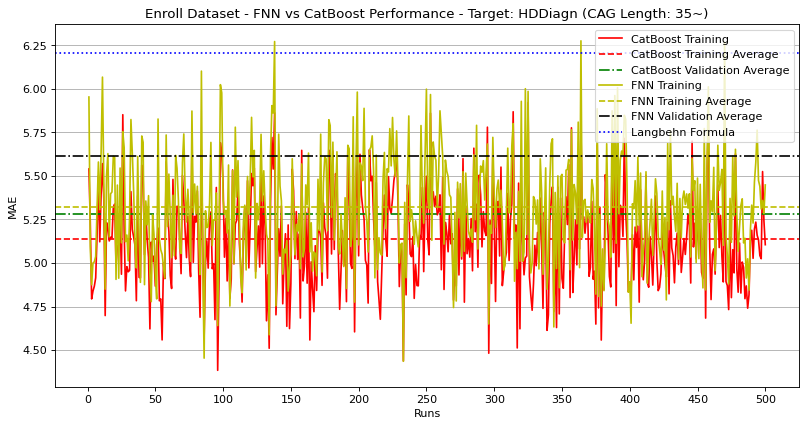

In [70]:
## MAE Graph - CatBoosting vs Neural Network Performance

plt.figure(figsize = (12,6))

plt.plot(runs, fr_mae_c_fs1, 'r', label='CatBoost Training')
plt.axhline(y = np.nanmean(fr_mae_c_fs1), color='r', linestyle='--', label='CatBoost Training Average')
plt.axhline(y = fr_cb_val['MAE'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')
plt.plot(runs, fr_mae_n_fs1, color='y', label='FNN Training')
plt.axhline(y = np.nanmean(fr_mae_n_fs1), color='y', linestyle='--', label='FNN Training Average')
plt.axhline(y = fr_nn_val['MAE'].values, color='black', linestyle='dashdot', label='FNN Validation Average')
plt.axhline(y = fr_lb_eval[0], color='b', linestyle=':', label='Langbehn Formula')

plt.ylabel('MAE')
plt.xlabel('Runs')
plt.xticks(range(0,len(cb_res_fs1)+1,50))
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 35~)')
plt.legend()
plt.grid(axis='y')
plt.show()

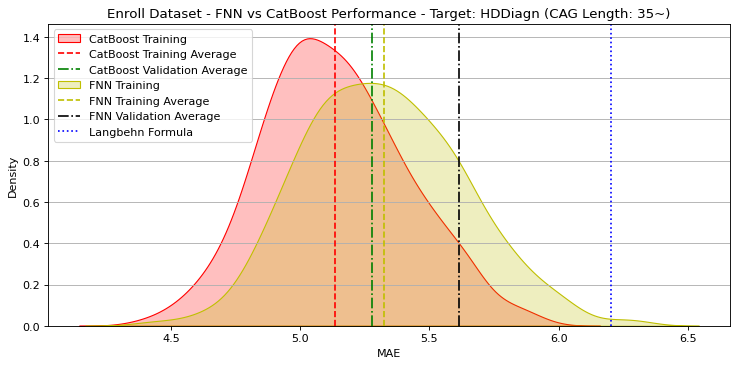

In [71]:
## MAE Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(11,5))

sns.kdeplot(fr_cb_df, x="mae", color='r', ax=ax, label='CatBoost Training', fill=True)
plt.axvline(np.nanmean(fr_mae_c_fs1), 0,9, color='r', linestyle='--', label='CatBoost Training Average')
plt.axvline(fr_cb_val['MAE'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')

sns.kdeplot(fr_nn_df, x="mae", color='y',ax=ax, label='FNN Training', fill=True)
plt.axvline(np.nanmean(fr_mae_n_fs1), 0,9, color='y', linestyle='--', label='FNN Training Average')
plt.axvline(fr_nn_val['MAE'].values, color='black', linestyle='dashdot', label='FNN Validation Average')

plt.axvline(fr_lb_eval[0], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('MAE')
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 35~)')
plt.legend()
plt.grid(axis='y')
plt.show()


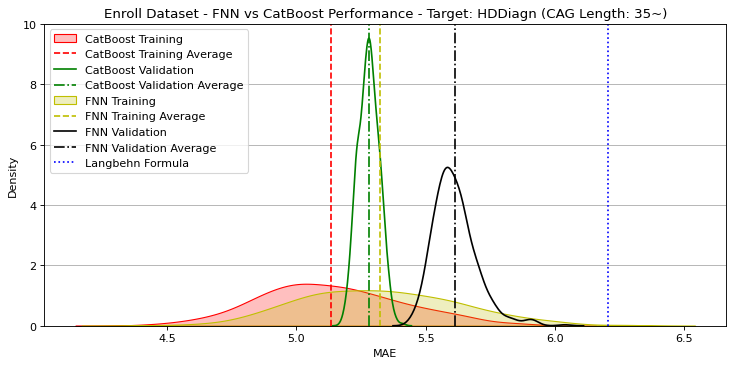

In [72]:
## MAE Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(11,5))

sns.kdeplot(fr_cb_df, x="mae", color='r', ax=ax, label='CatBoost Training', fill=True)
plt.axvline(np.nanmean(fr_mae_c_fs1), 0,9, color='r', linestyle='--', label='CatBoost Training Average')
sns.kdeplot(fr_cb_val_df, x="mae", color='green', ax=ax, label='CatBoost Validation')
plt.axvline(fr_cb_val['MAE'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')

sns.kdeplot(fr_nn_df, x="mae", color='y',ax=ax, label='FNN Training', fill=True)
plt.axvline(np.nanmean(fr_mae_n_fs1), 0,9, color='y', linestyle='--', label='FNN Training Average')
sns.kdeplot(fr_nn_val_df, x="mae", color='black', ax=ax, label='FNN Validation')
plt.axvline(fr_nn_val['MAE'].values, color='black', linestyle='dashdot', label='FNN Validation Average')

plt.axvline(fr_lb_eval[0], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('MAE')
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 35~)')
plt.legend()
plt.grid(axis='y')
plt.show()


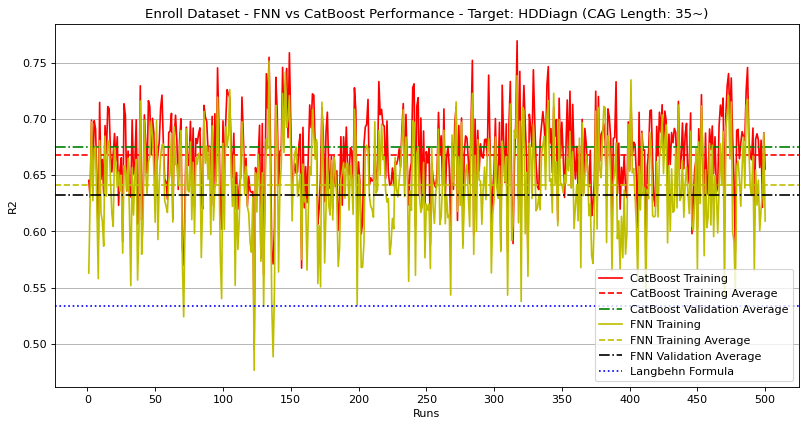

In [73]:
## R2 Graph - CatBoosting vs Neural Network Performance

plt.figure(figsize = (12,6))
plt.plot(fr_runs, fr_r2_c_fs1, 'r', label='CatBoost Training')
plt.axhline(y = np.nanmean(fr_r2_c_fs1), color='r', linestyle='--', label='CatBoost Training Average')
plt.axhline(y = fr_cb_val['R2'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')
plt.plot(fr_runs, fr_r2_n_fs1, color='y', label='FNN Training')
plt.axhline(y = np.nanmean(fr_r2_n_fs1), color='y', linestyle='--', label='FNN Training Average')
plt.axhline(y = fr_nn_val['R2'].values, color='black', linestyle='dashdot', label='FNN Validation Average')
plt.axhline(y = fr_lb_eval[2], color='b', linestyle=':', label='Langbehn Formula')

plt.ylabel('R2')
plt.xlabel('Runs')
plt.xticks(range(0,len(fr_cb_res_fs1)+1,50))
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 35~)')
plt.legend()
plt.grid(axis='y')
plt.show()

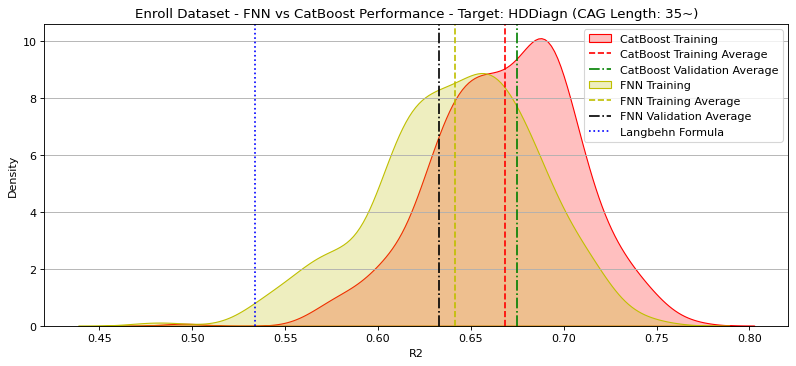

In [74]:
## R2 Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(12,5))

sns.kdeplot(fr_cb_df, x="r2", color='r', ax=ax, label='CatBoost Training', fill=True)
plt.axvline(np.nanmean(fr_r2_c_fs1), 0,9, color='r', linestyle='--', label='CatBoost Training Average')
plt.axvline(fr_cb_val['R2'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')
sns.kdeplot(fr_nn_df, x="r2", color='y',ax=ax, label='FNN Training', fill=True)
plt.axvline(np.nanmean(fr_r2_n_fs1), 0,9, color='y', linestyle='--', label='FNN Training Average')
plt.axvline(fr_nn_val['R2'].values, color='black', linestyle='dashdot', label='FNN Validation Average')
plt.axvline(fr_lb_eval[2], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('R2')
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 35~)')
plt.legend()
plt.grid(axis='y')
plt.show()


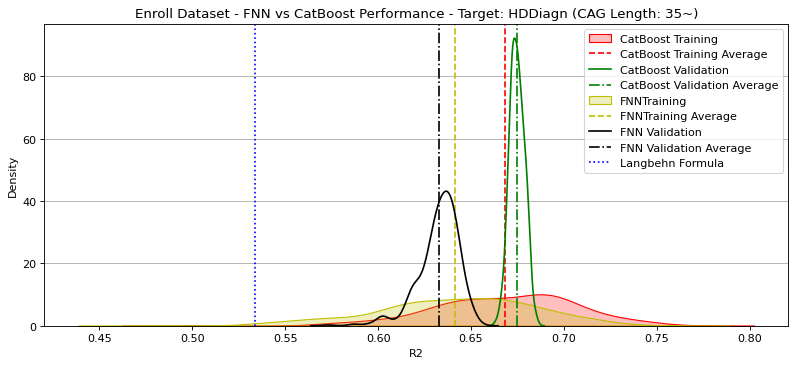

In [75]:
## R2 Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(12,5))

sns.kdeplot(fr_cb_df, x="r2", color='r', ax=ax, label='CatBoost Training', fill=True)
plt.axvline(np.nanmean(fr_r2_c_fs1), 0,9, color='r', linestyle='--', label='CatBoost Training Average')
sns.kdeplot(fr_cb_val_df, x="r2", color='green', ax=ax, label='CatBoost Validation')
plt.axvline(fr_cb_val['R2'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')
sns.kdeplot(fr_nn_df, x="r2", color='y',ax=ax, label='FNNTraining', fill=True)
plt.axvline(np.nanmean(fr_r2_n_fs1), 0,9, color='y', linestyle='--', label='FNNTraining Average')
sns.kdeplot(fr_nn_val_df, x="r2", color='black', ax=ax, label='FNN Validation')
plt.axvline(fr_nn_val['R2'].values, color='black', linestyle='dashdot', label='FNN Validation Average')
plt.axvline(fr_lb_eval[2], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('R2')
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 35~)')
plt.grid(axis='y')
plt.legend()
plt.show()


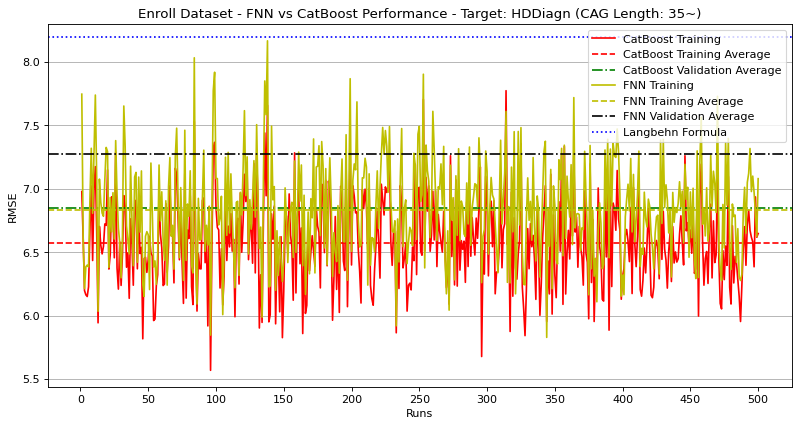

In [76]:
## RMSE Graph - CatBoosting vs Neural Network Performance

plt.figure(figsize = (12,6))

plt.plot(runs, fr_rmse_c_fs1, 'r', label='CatBoost Training')
plt.axhline(y = np.nanmean(fr_rmse_c_fs1), color='r', linestyle='--', label='CatBoost Training Average')
plt.axhline(y = fr_cb_val['RMSE'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')
plt.plot(runs, fr_rmse_n_fs1, color='y', label='FNN Training')
plt.axhline(y = np.nanmean(fr_rmse_n_fs1), color='y', linestyle='--', label='FNN Training Average')
plt.axhline(y = fr_nn_val['RMSE'].values, color='black', linestyle='dashdot', label='FNN Validation Average')
plt.axhline(y = fr_lb_eval[1], color='b', linestyle=':', label='Langbehn Formula')

plt.ylabel('RMSE')
plt.xlabel('Runs')
plt.xticks(range(0,len(cb_res_fs1)+1,50))
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 35~)')
plt.legend()
plt.grid(axis='y')
plt.show()

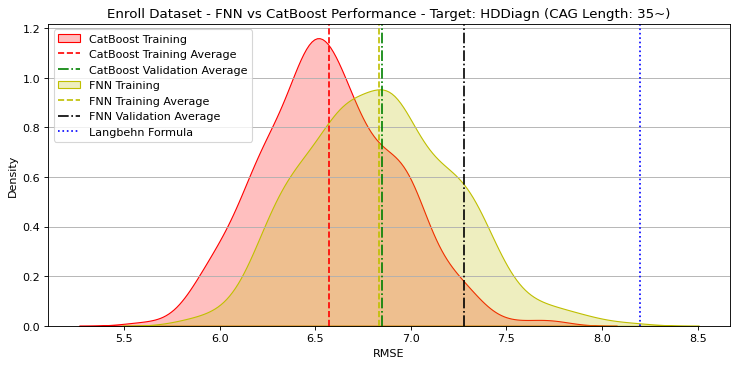

In [77]:
## RMSE Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(11,5))

sns.kdeplot(fr_cb_df, x="rmse", color='r', ax=ax, label='CatBoost Training', fill=True)
plt.axvline(np.nanmean(fr_rmse_c_fs1), 0,9, color='r', linestyle='--', label='CatBoost Training Average')
plt.axvline(fr_cb_val['RMSE'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')

sns.kdeplot(fr_nn_df, x="rmse", color='y',ax=ax, label='FNN Training', fill=True)
plt.axvline(np.nanmean(fr_rmse_n_fs1), 0,9, color='y', linestyle='--', label='FNN Training Average')
plt.axvline(fr_nn_val['RMSE'].values, color='black', linestyle='dashdot', label='FNN Validation Average')

plt.axvline(fr_lb_eval[1], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('RMSE')
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 35~)')
plt.legend()
plt.grid(axis='y')
plt.show()

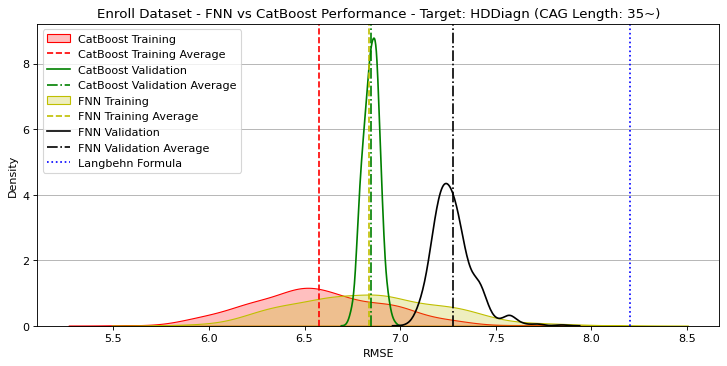

In [78]:
## RMSE Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(11,5))

sns.kdeplot(fr_cb_df, x="rmse", color='r', ax=ax, label='CatBoost Training', fill=True)
plt.axvline(np.nanmean(fr_rmse_c_fs1), 0,9, color='r', linestyle='--', label='CatBoost Training Average')
sns.kdeplot(fr_cb_val_df, x="rmse", color='green', ax=ax, label='CatBoost Validation')
plt.axvline(fr_cb_val['RMSE'].values, color='green', linestyle='dashdot', label='CatBoost Validation Average')

sns.kdeplot(fr_nn_df, x="rmse", color='y',ax=ax, label='FNN Training', fill=True)
plt.axvline(np.nanmean(fr_rmse_n_fs1), 0,9, color='y', linestyle='--', label='FNN Training Average')
sns.kdeplot(fr_nn_val_df, x="rmse", color='black', ax=ax, label='FNN Validation')
plt.axvline(fr_nn_val['RMSE'].values, color='black', linestyle='dashdot', label='FNN Validation Average')

plt.axvline(fr_lb_eval[1], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('RMSE')
plt.title('Enroll Dataset - FNN vs CatBoost Performance - Target: HDDiagn (CAG Length: 35~)')
plt.legend()
plt.grid(axis='y')
plt.show()

## -------------------------------------------------------------------